In [1]:
import os
import cv2
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import numpy as np


In [3]:
img_height = 128
img_width = 128
batch_size = 100

In [4]:
import matplotlib.pyplot as plt

In [5]:
ds_train = tf.keras.preprocessing.image_dataset_from_directory(
    "imagedataset/train/",
    labels="inferred",
    label_mode="int", 
    color_mode="grayscale",
    batch_size=batch_size,
    image_size=(img_height, img_width),  # reshape if not in this size
    shuffle=True,
    seed=123,
    validation_split=0.01,
    subset="training",
)

ds_validation = tf.keras.preprocessing.image_dataset_from_directory(
    "imagedataset/test/",
    labels="inferred",
    label_mode="int", 
    color_mode="grayscale",
    batch_size=1
    ,
    image_size=(img_height, img_width),  # reshape if not in this size
    shuffle=True,
    seed=123,
    validation_split=0.95,
    subset="validation",
)


Found 70070 files belonging to 35 classes.
Using 69370 files for training.
Found 6965 files belonging to 35 classes.
Using 6616 files for validation.


In [6]:
img=cv2.imread("imagedataset/test/6/1001.jpg",0)
#cv2.imshow("test",img)
print(img.shape)

(128, 128)


In [7]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(128, 128, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.Dense(35)
])

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 64)      640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 57600)             0         
                                                                 
 dense (Dense)               (None, 512)               2

In [8]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=[tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),],
    metrics=["accuracy"],
)

In [9]:
# model.compile(
#     optimizer=tf.keras.optimizers.Adam(),
#     metrics=["accuracy"],
# )

In [10]:
# def augment(x, y):
#     image = tf.image.random_brightness(x, max_delta=0.05)
#     return image, y


# ds_train = ds_train.map(augment)

In [11]:
history = model.fit(ds_train, epochs=10, verbose=1)

Epoch 1/10
694/694 [==============================] - 129s 174ms/step - loss: 1.4720 - accuracy: 0.9850
Epoch 2/10
694/694 [==============================] - 122s 175ms/step - loss: 5.5155e-07 - accuracy: 1.0000
Epoch 3/10
694/694 [==============================] - 124s 179ms/step - loss: 2.4596e-07 - accuracy: 1.0000
Epoch 4/10
694/694 [==============================] - 158s 227ms/step - loss: 1.3993e-07 - accuracy: 1.0000
Epoch 5/10
694/694 [==============================] - 126s 181ms/step - loss: 8.7254e-08 - accuracy: 1.0000
Epoch 6/10
694/694 [==============================] - 127s 182ms/step - loss: 5.7640e-08 - accuracy: 1.0000
Epoch 7/10
694/694 [==============================] - 126s 181ms/step - loss: 3.9225e-08 - accuracy: 1.0000
Epoch 8/10
694/694 [==============================] - 128s 183ms/step - loss: 2.7270e-08 - accuracy: 1.0000
Epoch 9/10
694/694 [==============================] - 128s 184ms/step - loss: 1.9183e-08 - accuracy: 1.0000 - loss: 1.9091e-08 - ac
Epoch 10

In [12]:
print(history.history.keys())
print(history.history.values())
print(history.history)



dict_keys(['loss', 'accuracy'])
dict_values([[1.47201669216156, 5.515477710105188e-07, 2.4596369030405185e-07, 1.3993110314913793e-07, 8.725424294198092e-08, 5.764031030253136e-08, 3.9225415804367e-08, 2.7270150582126007e-08, 1.9183113764142945e-08, 1.3665156117781407e-08], [0.9850079417228699, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]])
{'loss': [1.47201669216156, 5.515477710105188e-07, 2.4596369030405185e-07, 1.3993110314913793e-07, 8.725424294198092e-08, 5.764031030253136e-08, 3.9225415804367e-08, 2.7270150582126007e-08, 1.9183113764142945e-08, 1.3665156117781407e-08], 'accuracy': [0.9850079417228699, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]}


# graph for loss and accuracy

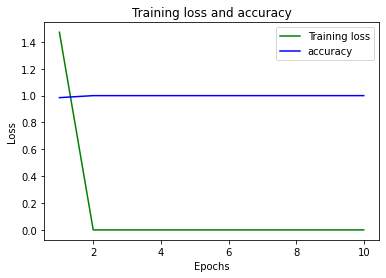

In [14]:
loss = history.history['loss']
accuracy = history.history['accuracy']

epochs = range(1,11)
plt.plot(epochs, loss, 'g', label='Training loss')
plt.plot(epochs, accuracy, 'b', label='accuracy')
plt.title('Training loss and accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [10]:
# model.save('saved_model/stage1_flip_01')

INFO:tensorflow:Assets written to: saved_model/stage1_flip_01\assets


# evaluate

In [15]:
def augment(x, y):
    image = tf.image.random_brightness(x, max_delta=0.05)
    return image, y


ds_train = ds_validation.map(augment)

In [17]:
new_model = tf.keras.models.load_model('saved_model/stage1_flip')

# Check its architecture
new_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 64)      640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 57600)             0         
                                                                 
 dense (Dense)               (None, 512)               2

In [18]:
new_history=new_model.evaluate(ds_validation)

6616/6616 [==============================] - 30s 5ms/step - loss: 0.1880 - accuracy: 0.9761


In [19]:
print(new_history)

[0.1879652887582779, 0.9761185050010681]


In [20]:
new_model.predict()

TypeError: predict() missing 1 required positional argument: 'x'